# Expore graphcast-gfs output

* <https://noaa-nws-graphcastgfs-pds.s3.amazonaws.com/index.html>
* <https://registry.opendata.aws/noaa-nws-graphcastgfs-pds/>

In [1]:
import xarray as xr
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [4]:
# Load a GRIB file with xarray
filename = "graphcastgfs.t18z.pgrb2.0p25.f144"

# https://github.com/ecmwf/cfgrib/issues/263
# https://github.com/ecmwf/cfgrib#filter-heterogeneous-grib-files

ds = xr.open_dataset("/Users/eabarnes/Downloads/" + filename, engine="cfgrib")
da = xr.open_dataset(
    "/Users/eabarnes/Downloads/" + filename,
    engine="cfgrib",
    backend_kwargs={"filter_by_keys": {"typeOfLevel": "heightAboveGround", "level": 2}},
)["t2m"]

ds

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/graphcast/lib/python3.10/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/graphcast/lib/python3.10/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(10.0)) new_value=Variable(dimensions=(), data=np.float64(2.0))


<xarray.Dataset> Size: 341MB
Dimensions:            (latitude: 721, longitude: 1440, isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         datetime64[ns] 8B ...
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
    meanSea            float64 8B ...
    surface            float64 8B ...
Data variables:
    u10                (latitude, longitude) float32 4MB ...
    v10                (latitude, longitude) float32 4MB ...
    gh                 (isobaricInhPa, latitude, longitude) float32 54MB ...
    prmsl              (latitude, longitude) float32 4MB ...
    q                  (isobaricInhPa, latitude, longitude) float32 54MB ...
    t                  (isobaricInhPa, latitude, longitude) float32 54MB ...
    unknown            (latitude, longitude) float32 4MB ...
    u                  (isobaricInhPa, latitude, longitude) float32 54MB ...
    v                  (isobaricInhPa, latitude, longitude) float32 54MB ...
    w                  (isobaricInhPa, latitude, longitude) float32 54MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             U.K. Met Office - Exeter
    history:                 2024-09-27T07:44 GRIB to CDM+CF via cfgrib-0.9.1...

<xarray.DataArray 'isobaricInhPa' (isobaricInhPa: 13)> Size: 104B
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   50.])
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
    valid_time         datetime64[ns] 8B ...
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
    meanSea            float64 8B ...
    surface            float64 8B ...
Attributes:
    long_name:         pressure
    units:             hPa
    positive:          down
    stored_direction:  decreasing
    standard_name:     air_pressure


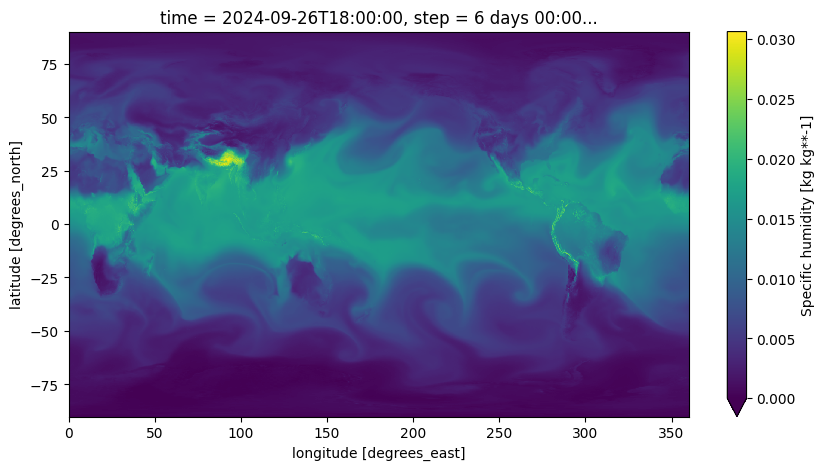

In [12]:
print(ds["isobaricInhPa"])
plt.figure(figsize=(10, 5))
ds["q"][0,:,:].plot(cmap="viridis", vmin=0)

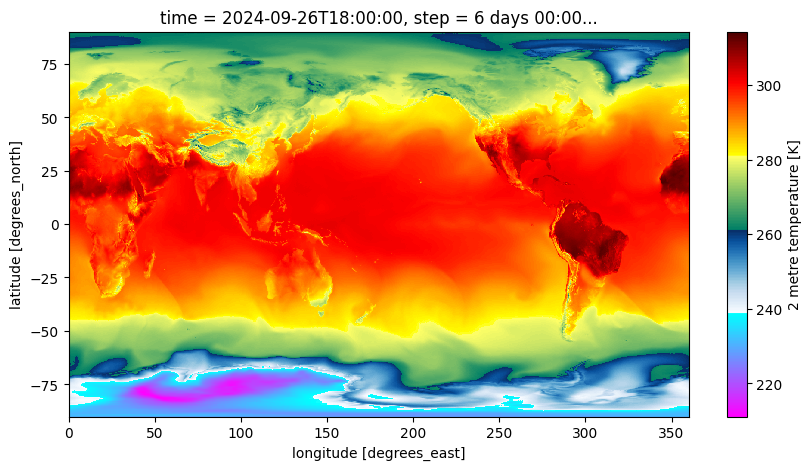

In [3]:
# temperature colormap from pickle
fp = open('../lecture_code/sfc_temp_cmap.pkl', 'rb')
sfc_temp_cmap = pickle.load(fp)
fp.close()

plt.figure(figsize=(10, 5))
da.plot(cmap=sfc_temp_cmap)